In [1]:
##importing time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import statsmodels

import requests

import ydata_profiling
from ydata_profiling.utils.cache import cache_file
from pathlib import Path

In [2]:
## import the csv file made in the previous 'data wrangling'

df = pd.read_csv('wrangled_data.csv')

df.head()

Unnamed: 0  membership  traitsig        ensg_version      gene  \
0           0      0.5158    0.2172  ENSG00000137959.15    IFI44L   
1           1      0.5497    0.4713  ENSG00000160710.16      ADAR   
2           2      0.7754    0.5447  ENSG00000082512.14     TRAF5   
3           3      0.7309    0.4325  ENSG00000163219.11  ARHGAP25   
4           4      0.5587    0.4396  ENSG00000153208.16     MERTK   

  assoc_enzymes  enzyme_class  Vitamin A Factor  Vitamin C Factor  \
0         other             0               NaN               NaN   
1     deaminase             3              0.10           0.06250   
2         other             0               NaN               NaN   
3        GTPase             3              0.10           0.06250   
4        kinase             2              0.05           0.09375   

   Iron Factor  ...  Copper Factor  Manganese Factor  Molybdenum Factor  \
0          NaN  ...            NaN               NaN                NaN   
1          NaN  ...            NaN          0.230769                NaN   
2          NaN  ...            NaN               NaN                NaN   
3          NaN  ...            NaN          0.230769                NaN   
4          NaN  ...            NaN          0.076923                NaN   

   Chloride Factor  Potassium Factor  Choline Factor  Magnesium Factor  \
0              NaN               NaN             NaN               NaN   
1              1.0               1.0        0.333333               0.3   
2              NaN               NaN             NaN               NaN   
3              1.0               1.0        0.333333               0.3   
4              NaN               NaN        0.466667               0.4   

   Phosphate Factor  Calcium Factor  Chromium Factor  
0               NaN             NaN              NaN  
1               0.3        0.307692         0.384615  
2               NaN             NaN              NaN  
3               0.3        0.307692         0.384615  
4               0.4        0.153846         0.538462  

[5 rows x 34 columns]

In [3]:
##drop the new index and fill na values

df = df.drop(columns=['Unnamed: 0'])

In [4]:
df = df.fillna(0)

In [5]:
df.dtypes

membership                 float64
traitsig                   float64
ensg_version                object
gene                        object
assoc_enzymes               object
enzyme_class                 int64
Vitamin A Factor           float64
Vitamin C Factor           float64
Iron Factor                float64
Vitamin D Factor           float64
Vitamin E Factor           float64
Vitamin K Factor           float64
Thiamin Factor             float64
Riboflavin Factor          float64
Niacin Factor              float64
Vitamin B6 Factor          float64
Folate Factor              float64
Vitamin B12 Factor         float64
Biotin Factor              float64
Pantothenic Acid Factor    float64
Iodine Factor              float64
Zinc Factor                float64
Selenium Factor            float64
Copper Factor              float64
Manganese Factor           float64
Molybdenum Factor          float64
Chloride Factor            float64
Potassium Factor           float64
Choline Factor      

In [6]:
## lets drop the columns with strings for just the sake of making this a numerical only analysis
##also drop enzyme class because it is just a category

df_2 = df.drop(columns=['ensg_version','assoc_enzymes','gene', 'enzyme_class'])

In [7]:
df_2.dtypes

membership                 float64
traitsig                   float64
Vitamin A Factor           float64
Vitamin C Factor           float64
Iron Factor                float64
Vitamin D Factor           float64
Vitamin E Factor           float64
Vitamin K Factor           float64
Thiamin Factor             float64
Riboflavin Factor          float64
Niacin Factor              float64
Vitamin B6 Factor          float64
Folate Factor              float64
Vitamin B12 Factor         float64
Biotin Factor              float64
Pantothenic Acid Factor    float64
Iodine Factor              float64
Zinc Factor                float64
Selenium Factor            float64
Copper Factor              float64
Manganese Factor           float64
Molybdenum Factor          float64
Chloride Factor            float64
Potassium Factor           float64
Choline Factor             float64
Magnesium Factor           float64
Phosphate Factor           float64
Calcium Factor             float64
Chromium Factor     

In [8]:
### remember the flow of the logic
#1. the 'membership and traitsig' are identifiers for the gene group most associated with the largest muscle gain in the paper
#2. the membership and traitsig are two different ways if weighing the gene groups on their association with the largest muscle gain.. aka higher values in these two columns = more significance in muscle growth
#3. the nutrients and minerals are now linked to the weights because of their gene/enzyme classifications in the previous step

##independent variables will be membership and traitsig
##dependent variables will be nutrient and minerals

In [9]:
correlation = df_2.corr()

print (correlation)

##seems like the correlation between traitsig and membership with the nutrient are very low and close to 0

                         membership  traitsig  Vitamin A Factor  \
membership                 1.000000  0.546786         -0.029486   
traitsig                   0.546786  1.000000         -0.100658   
Vitamin A Factor          -0.029486 -0.100658          1.000000   
Vitamin C Factor          -0.038477 -0.110822          0.993196   
Iron Factor               -0.035602 -0.088847          0.979760   
Vitamin D Factor          -0.036564 -0.096650          0.971684   
Vitamin E Factor          -0.074477 -0.136229          0.635811   
Vitamin K Factor          -0.070087 -0.113244          0.172343   
Thiamin Factor            -0.069302 -0.134020          0.418714   
Riboflavin Factor         -0.032439 -0.140280          0.887843   
Niacin Factor             -0.069160 -0.104171          0.169269   
Vitamin B6 Factor         -0.058963 -0.131418          0.432822   
Folate Factor             -0.052137 -0.158428          0.721932   
Vitamin B12 Factor        -0.001378 -0.107440          0.23420

In [10]:
sns.pairplot(data=df_2)
plt.show()

##this is not useful

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

In [11]:
## lets use ydata-profiling

report = df_2.profile_report(
    sort=None, html={"style": {"full_width": True}}, progress_bar=False
)
report

In [12]:
### profiling report says there this a large imbalance for every nutrient/vitamin , which makes sense because there are so many zeroes
### the high correlation for membership and traitsig makes sense as those came from the paper
### the high correlation of the vitamins/minerals with each other may have to do with their limited proportions


### lets check the distribution of membership and traitsig, subset the highest values, and from there see what the nutrient and vitamin numbers are



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


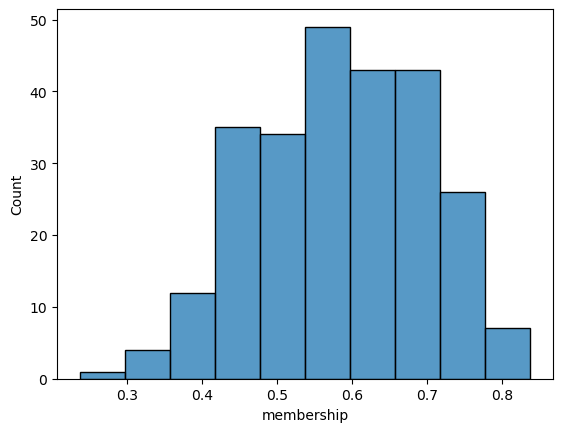

In [13]:
sns.histplot(df_2['membership'], bins = 10)

plt.show()

In [14]:
##lets set a threshold of .7 to be included in subset

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


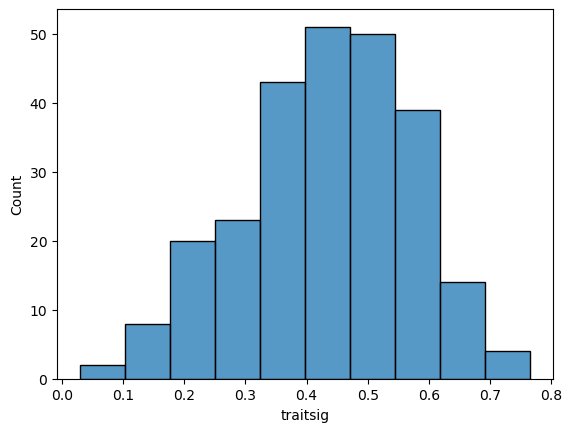

In [15]:
sns.histplot(df_2['traitsig'], bins = 10)

plt.show()

In [16]:
#let set a threshold of .6 to be in subset

In [17]:
df_3 = df_2[df_2['membership'] >= .7]
df_3 = df_3[df_3['traitsig'] >=  .6]

df_3.describe()

membership  traitsig  Vitamin A Factor  Vitamin C Factor  Iron Factor  \
count    8.000000  8.000000          8.000000          8.000000          8.0   
mean     0.769262  0.643075          0.012500          0.007812          0.0   
std      0.041389  0.030006          0.035355          0.022097          0.0   
min      0.702100  0.613200          0.000000          0.000000          0.0   
25%      0.752275  0.618175          0.000000          0.000000          0.0   
50%      0.767150  0.633850          0.000000          0.000000          0.0   
75%      0.794050  0.662400          0.000000          0.000000          0.0   
max      0.828400  0.687800          0.100000          0.062500          0.0   

       Vitamin D Factor  Vitamin E Factor  Vitamin K Factor  Thiamin Factor  \
count               8.0               8.0               8.0        8.000000   
mean                0.0               0.0               0.0        0.005435   
std                 0.0               0.0               0.0        0.015372   
min                 0.0               0.0               0.0        0.000000   
25%                 0.0               0.0               0.0        0.000000   
50%                 0.0               0.0               0.0        0.000000   
75%                 0.0               0.0               0.0        0.000000   
max                 0.0               0.0               0.0        0.043478   

       Riboflavin Factor  ...  Copper Factor  Manganese Factor  \
count           8.000000  ...            8.0          8.000000   
mean            0.014706  ...            0.0          0.028846   
std             0.041595  ...            0.0          0.081589   
min             0.000000  ...            0.0          0.000000   
25%             0.000000  ...            0.0          0.000000   
50%             0.000000  ...            0.0          0.000000   
75%             0.000000  ...            0.0          0.000000   
max             0.117647  ...            0.0          0.230769   

       Molybdenum Factor  Chloride Factor  Potassium Factor  Choline Factor  \
count                8.0         8.000000          8.000000        8.000000   
mean                 0.0         0.125000          0.125000        0.041667   
std                  0.0         0.353553          0.353553        0.117851   
min                  0.0         0.000000          0.000000        0.000000   
25%                  0.0         0.000000          0.000000        0.000000   
50%                  0.0         0.000000          0.000000        0.000000   
75%                  0.0         0.000000          0.000000        0.000000   
max                  0.0         1.000000          1.000000        0.333333   

       Magnesium Factor  Phosphate Factor  Calcium Factor  Chromium Factor  
count          8.000000          8.000000        8.000000         8.000000  
mean           0.037500          0.037500        0.038462         0.048077  
std            0.106066          0.106066        0.108786         0.135982  
min            0.000000          0.000000        0.000000         0.000000  
25%            0.000000          0.000000        0.000000         0.000000  
50%            0.000000          0.000000        0.000000         0.000000  
75%            0.000000          0.000000        0.000000         0.000000  
max            0.300000          0.300000        0.307692         0.384615  

[8 rows x 29 columns]

In [18]:
## from here we can assume that these vitamins and minerals are the most crucial to my successful muscle growth
## lets start to look at the vitamins and mineral values
##lets drop the traitsig and membership because we know that they are the highest out of the paper, so they are no longer necessary

df_4 = df_3.drop(columns=['membership','traitsig'])

df_4.describe()

Vitamin A Factor  Vitamin C Factor  Iron Factor  Vitamin D Factor  \
count          8.000000          8.000000          8.0               8.0   
mean           0.012500          0.007812          0.0               0.0   
std            0.035355          0.022097          0.0               0.0   
min            0.000000          0.000000          0.0               0.0   
25%            0.000000          0.000000          0.0               0.0   
50%            0.000000          0.000000          0.0               0.0   
75%            0.000000          0.000000          0.0               0.0   
max            0.100000          0.062500          0.0               0.0   

       Vitamin E Factor  Vitamin K Factor  Thiamin Factor  Riboflavin Factor  \
count               8.0               8.0        8.000000           8.000000   
mean                0.0               0.0        0.005435           0.014706   
std                 0.0               0.0        0.015372           0.041595   
min                 0.0               0.0        0.000000           0.000000   
25%                 0.0               0.0        0.000000           0.000000   
50%                 0.0               0.0        0.000000           0.000000   
75%                 0.0               0.0        0.000000           0.000000   
max                 0.0               0.0        0.043478           0.117647   

       Niacin Factor  Vitamin B6 Factor  ...  Copper Factor  Manganese Factor  \
count            8.0           8.000000  ...            8.0          8.000000   
mean             0.0           0.010870  ...            0.0          0.028846   
std              0.0           0.030744  ...            0.0          0.081589   
min              0.0           0.000000  ...            0.0          0.000000   
25%              0.0           0.000000  ...            0.0          0.000000   
50%              0.0           0.000000  ...            0.0          0.000000   
75%              0.0           0.000000  ...            0.0          0.000000   
max              0.0           0.086957  ...            0.0          0.230769   

       Molybdenum Factor  Chloride Factor  Potassium Factor  Choline Factor  \
count                8.0         8.000000          8.000000        8.000000   
mean                 0.0         0.125000          0.125000        0.041667   
std                  0.0         0.353553          0.353553        0.117851   
min                  0.0         0.000000          0.000000        0.000000   
25%                  0.0         0.000000          0.000000        0.000000   
50%                  0.0         0.000000          0.000000        0.000000   
75%                  0.0         0.000000          0.000000        0.000000   
max                  0.0         1.000000          1.000000        0.333333   

       Magnesium Factor  Phosphate Factor  Calcium Factor  Chromium Factor  
count          8.000000          8.000000        8.000000         8.000000  
mean           0.037500          0.037500        0.038462         0.048077  
std            0.106066          0.106066        0.108786         0.135982  
min            0.000000          0.000000        0.000000         0.000000  
25%            0.000000          0.000000        0.000000         0.000000  
50%            0.000000          0.000000        0.000000         0.000000  
75%            0.000000          0.000000        0.000000         0.000000  
max            0.300000          0.300000        0.307692         0.384615  

[8 rows x 27 columns]

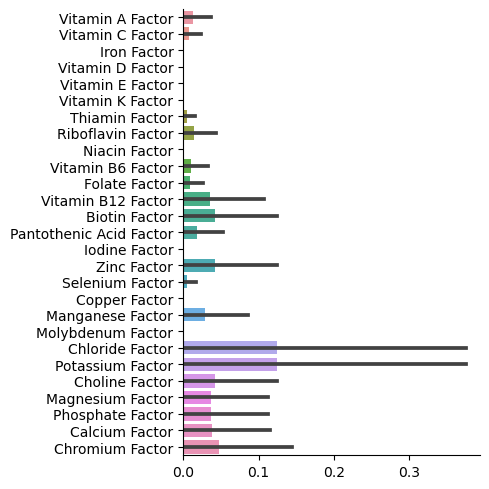

In [19]:
##these nutrients are sparsely spread out

## lets take a look at a barplot of the means

sns.catplot(data=df_4, kind='bar', orient='h')
plt.show()


###in the model, might expect chloride, potassium, choline, magnesium, phosphate, calcium, chromium, manganese, zinc, biotin, b12 to be important

## error bars are huge because of lack of filled data (lots of zeroes)
##lets take a look at swarmplot next

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 87.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


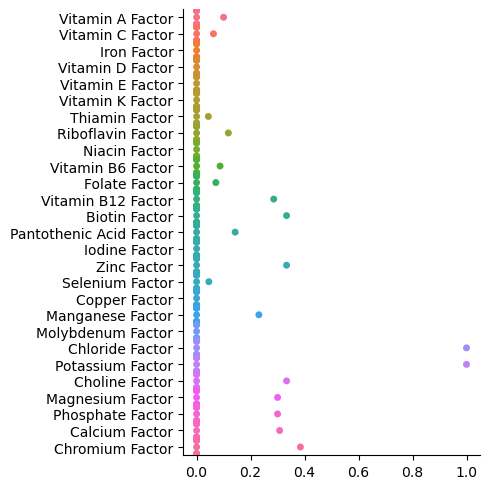

In [20]:
sns.catplot(data=df_4, kind='swarm', orient='h')
plt.show()

### essentially the same as above
##this is a much more realistic view of the vitamins and nutrients at play in these top importance gene clusters

In [21]:
###chloride and potassium are seeming like outliers compared to other association factors, may have to throw them out

## lets push all df_4 into one series of just values and check to see the distribution of those association factors through a histogram
## after that we can consider droping chloride and potassium factors even though they are very important for metabolism

def series_stripping(df):
    #initialize an empty series that something can be concatenated to
    series_0 = pd.Series()
    for i in range(len(df.columns)):
        ser = df.iloc[:,i]
        if i ==0:
            series_s = pd.concat([series_0, ser])
        elif i != 0:
            series_s = pd.concat([series_s, ser])
        
    
        
    return series_s
    


/var/folders/w4/swg_x0mn7sl_p9j90gy4tmk80000gn/T/ipykernel_15345/3483712849.py:12: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  series_s = pd.concat([series_0, ser])


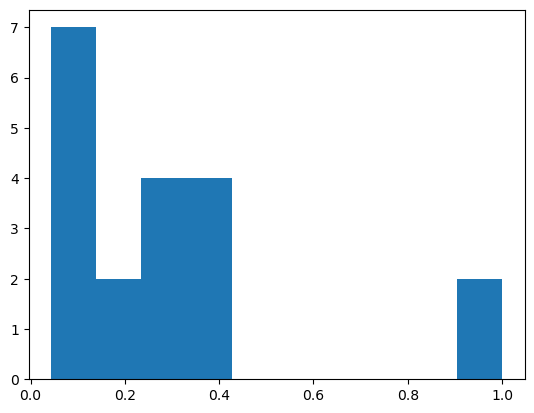

In [22]:
## actually make the series and then do a histplot

series_df4 = series_stripping(df_4)

series_df4_no_0 = series_df4[series_df4 != 0]
plt.hist(series_df4_no_0)
plt.show()

### chlorine and potassium are definitiely outliers and the distribution of values in this subset is not gaussian

/var/folders/w4/swg_x0mn7sl_p9j90gy4tmk80000gn/T/ipykernel_15345/3483712849.py:12: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  series_s = pd.concat([series_0, ser])


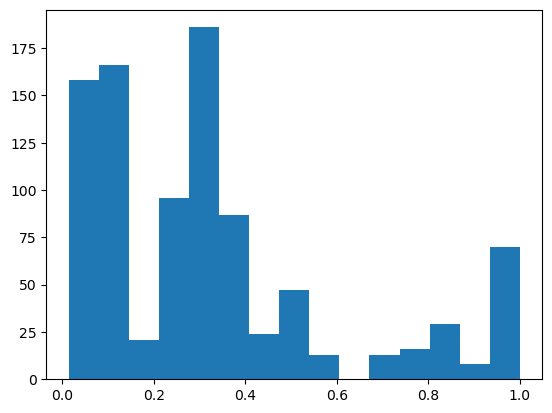

In [23]:
### lets check out the distribution of all of the nutrient/vitamin data 

##grab df_2 to get the df that still hasnt been filtered through membership and traitsig values
df_5 = df_2.drop(columns=['membership','traitsig'])

series_df5 = series_stripping(df_5)

series_df5_no_0 = series_df5[series_df5 != 0]
plt.hist(series_df5_no_0, bins=15)
plt.show()

### all of the association factors are not in a gaussian distribution!
### but it seems that it may be a bit rash to eliminate chloride and potassium values as there are association values around .7-.9 in addition to the chloride/potassium values

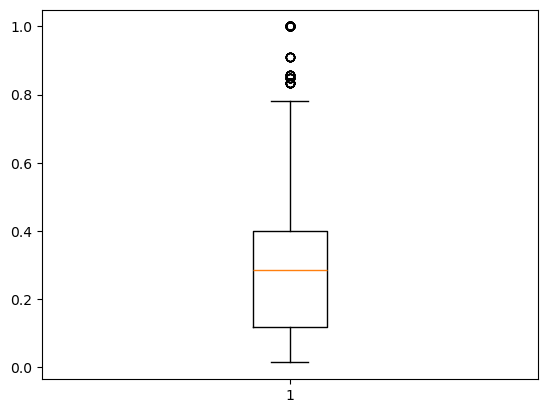

In [24]:
## lets do a boxplot of the association values


series_df5_no_0.shape

series_df5_no_0_corrected = np.reshape(series_df5_no_0, (934))

plt.boxplot(x=series_df5_no_0_corrected)
plt.show()

### if all assocation factors across all response variables are compared together, then .8 and above are considered outliers

In [25]:
### however, the assocation factors are based off of a proportion equalling one, so some nutrients and minerals will have to be removed because their ratio includes high proportion s(e.g. a 5/6 association factor)

### lets check the outliers on the membership and traitsig

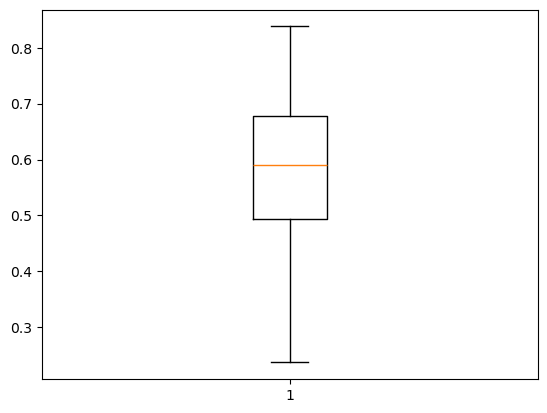

In [26]:
### membership boxplot

plt.boxplot(df['membership'])
plt.show()

###looks fine

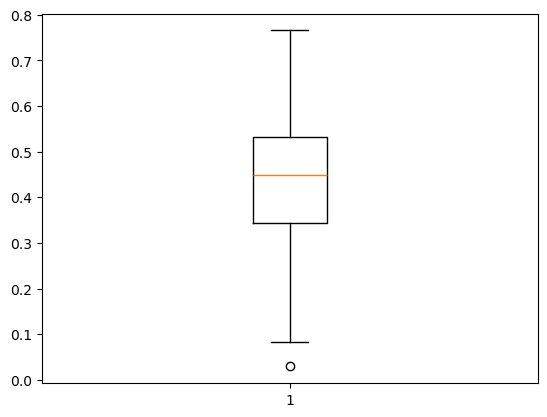

In [27]:
### traitsig boxplot

plt.boxplot(df['traitsig'])
plt.show()

### seems to be at least one--- we can drop that out

In [28]:
## lets do the math to get the IQR and do the outlier test

first_third_quartile = np.percentile(df['traitsig'],[25, 75])
IQR = first_third_quartile[1]- first_third_quartile[0]
IQR_range = IQR*1.5

lower_limit = first_third_quartile[0]- IQR_range


df_dropout = df[df['traitsig'] <= lower_limit]
print (df_dropout)


     membership  traitsig       ensg_version        gene assoc_enzymes  \
217        0.46    0.0291  ENSG00000219665.8  ZNF433-AS1         other   

     enzyme_class  Vitamin A Factor  Vitamin C Factor  Iron Factor  \
217             0               0.0               0.0          0.0   

     Vitamin D Factor  ...  Copper Factor  Manganese Factor  \
217               0.0  ...            0.0               0.0   

     Molybdenum Factor  Chloride Factor  Potassium Factor  Choline Factor  \
217                0.0              0.0               0.0             0.0   

     Magnesium Factor  Phosphate Factor  Calcium Factor  Chromium Factor  
217               0.0               0.0             0.0              0.0  

[1 rows x 33 columns]


In [29]:
model_df = df_2[df_2['traitsig'] >= lower_limit]

In [30]:
#### this exploratory data analysis has shown that:
### there is a high correlation with the traitsig and membership, but this is expected as they were already correlated in the paper they came from
### the distribution for traitsig and membership are gaussian in appearance
### there was only one outlier out of the two explanatory variables, and it was dropped

#### the assocation factors of the vitamins and minerals are all numeric now, but not without a plethora of zeroes
### the assocation factors are based off of dictionaries so the values are in set proportions per vitamin/mineral, this creates distributions that do not look norma
### because traitsig and membership are weighted, the nutrients/minerals associated with them were listed out, and there are some candidates for who will come out on top for significance in the model

In [31]:
model_df.to_csv('model_ready.csv')